In [1]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
from spread import variance, standard_deviation, zipped_z_scores

2.0
1.4142135623730951
[(-2, -1.414213562373095), (-1, -0.7071067811865475), (0, 0.0), (1, 0.7071067811865475), (2, 1.414213562373095)]


In [2]:
data_to_load = "global-fossil-fuel-consumption.csv"
Fossil_fuel_data = pd.read_csv(data_to_load)
Fossil_fuel_data.head()

,Entity,Code,Year,Coal (terawatt-hours),Crude oil (terawatt-hours),Natural gas (terawatt-hours),Population,GDP,Total CO2 Emissions Excluding Land-Use Change and Forestry (MtCO2),GDP growth (annual %),Population growth (annual %)
0,World,OWID_WRL,1965,16322.44092,17740.36827,6823.934577,3339592688,1.870000e+13,11266.800,5.571686,2.059444
1,World,OWID_WRL,1966,16512.65763,19104.36441,7426.217421,3408121405,1.970000e+13,11827.392,5.794680,2.112720
2,World,OWID_WRL,1967,16247.40207,20468.91567,7961.256227,3479053821,2.040000e+13,12193.792,4.432219,2.059204
3,World,OWID_WRL,1968,16493.29564,22225.38535,8668.151001,3551880700,2.150000e+13,12798.352,6.209321,2.039610
4,World,OWID_WRL,1969,17008.47160,24130.44943,9510.132872,3625905514,2.270000e+13,13556.800,6.148763,2.116434


In [3]:
Fossil_fuel_data = Fossil_fuel_data.rename(columns={"Coal (terawatt-hours)":"Coal consumption (terawatt-hours)",
                                                   "Crude oil (terawatt-hours)": "Crude oil consumption (terawatt-hours)",
                                                   "Natural gas (terawatt-hours)": "Natural gas consumption (terawatt-hours)",
                                                   "Total CO2 Emissions Excluding Land-Use Change and Forestry (MtCO2)": \
                                                    "Total CO2 Fossil Fuel emissions (MtCO2)"})
Fossil_fuel_data.head()

,Entity,Code,Year,Coal consumption (terawatt-hours),Crude oil consumption (terawatt-hours),Natural gas consumption (terawatt-hours),Population,GDP,Total CO2 Fossil Fuel emissions (MtCO2),GDP growth (annual %),Population growth (annual %)
0,World,OWID_WRL,1965,16322.44092,17740.36827,6823.934577,3339592688,1.870000e+13,11266.800,5.571686,2.059444
1,World,OWID_WRL,1966,16512.65763,19104.36441,7426.217421,3408121405,1.970000e+13,11827.392,5.794680,2.112720
2,World,OWID_WRL,1967,16247.40207,20468.91567,7961.256227,3479053821,2.040000e+13,12193.792,4.432219,2.059204
3,World,OWID_WRL,1968,16493.29564,22225.38535,8668.151001,3551880700,2.150000e+13,12798.352,6.209321,2.039610
4,World,OWID_WRL,1969,17008.47160,24130.44943,9510.132872,3625905514,2.270000e+13,13556.800,6.148763,2.116434


# CO2 emissions vs. Population 

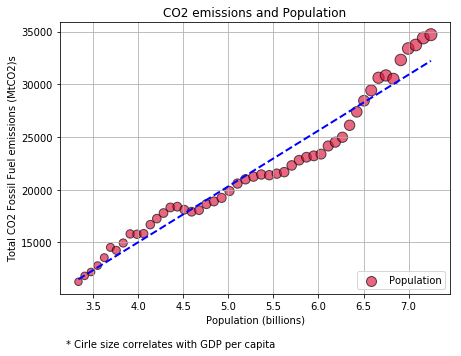

In [4]:
#  Bubble chart – CO2 emissions vs. Population

GDP_per_capita = Fossil_fuel_data["GDP"]/Fossil_fuel_data["Population"]
x_Population = Fossil_fuel_data["Population"]/1000000000
y_CO2_emissions = Fossil_fuel_data["Total CO2 Fossil Fuel emissions (MtCO2)"]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.scatter(x_Population, y_CO2_emissions, marker="o", facecolors="crimson", s=GDP_per_capita/100, 
            edgecolors="black", alpha=0.65, label="Population")

# Incorporate the other graph properties
plt.title("CO2 emissions and Population")
plt.xlabel("Population (billions)")
plt.ylabel("Total CO2 Fossil Fuel emissions (MtCO2)s")
plt.grid()
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower right')

plt.text(3.2, 5100, "* Cirle size correlates with GDP per capita")  

fig = plt.gcf()
fig.set_size_inches(7,5) 


# Set fit line
Pop_slope, Pop_intercept, Pop_r_value, Pop_p_value, Pop_std_err = linregress(x_Population, y_CO2_emissions)
Pop_fit = Pop_slope * x_Population + Pop_intercept
ax.plot(x_Population, Pop_fit, 'b--', linewidth=2)

# Save Figure
plt.savefig("Output/CO_emissions_vs_Population_GDP.png")

plt.show()

In [5]:
#Pop_slope, Pop_intercept, Pop_r_value, Pop_p_value, Pop_std_err = linregress(x_Population, y_CO2_emissions)
#Pop_fit = Pop_slope * x_Population + Pop_intercept

print(f"Slope value is: {Pop_slope}")
print(f"Intercept value is: {Pop_intercept}")
print(f"R-value is: {Pop_r_value}")
print(f"R-square value is: {np.square(Pop_r_value)}")
print(f"P-value is: {Pop_p_value}")
print(f"Standard error value is: {Pop_std_err}")

Slope value is: 5300.887507919899
Intercept value is: -6196.066283335484
R-value is: 0.9772121116258908
R-square value is: 0.9549435111083325
P-value is: 5.738999738750382e-34
Standard error value is: 166.19494154019628


# Regression analysis
* 95.5% of the total variability in Y (CO2 emissions) is explained by its regression on X (Population).

In [6]:
x_Population = 8

print("The total CO2 emissions when we reach a global population of " + str(x_Population) + " billions will be " \
      + (Pop_slope * x_Population + Pop_intercept).astype(int).astype(str) + " (MtCO2)s.")

The total CO2 emissions when we reach a global population of 8 billions will be 36211 (MtCO2)s.


# CO2 emissions vs. GDP growth

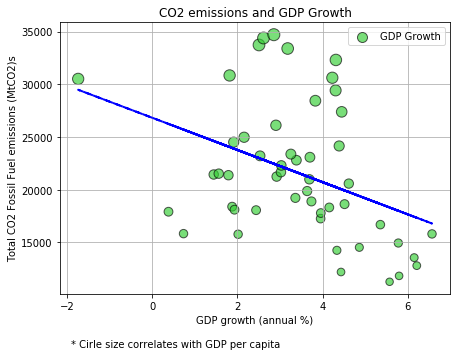

In [7]:
#  Bubble chart – CO2 emissions vs. GDP growth (%)

x_GDP_growth = Fossil_fuel_data["GDP growth (annual %)"]
y_CO2_emissions = Fossil_fuel_data["Total CO2 Fossil Fuel emissions (MtCO2)"]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.scatter(x_GDP_growth, y_CO2_emissions, marker="o", facecolors="limegreen", s=GDP_per_capita/100, 
            edgecolors="black", alpha=0.65, label="GDP Growth")

# Incorporate the other graph properties
plt.title("CO2 emissions and GDP Growth")
plt.xlabel("GDP growth (annual %)")
plt.ylabel("Total CO2 Fossil Fuel emissions (MtCO2)s")
plt.grid()
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='upper right')

plt.text(-1.9, 5100, "* Cirle size correlates with GDP per capita")  

fig = plt.gcf()
fig.set_size_inches(7,5) 


# Set fit line
(GDPg_slope, GDPg_intercept, GDPg_r_value, GDPg_p_value, GDPg_std_err) = linregress(x_GDP_growth, y_CO2_emissions)
GDPg_fit = GDPg_slope * x_GDP_growth + GDPg_intercept
ax.plot(x_GDP_growth, GDPg_fit, 'b--', linewidth=2)

# Save Figure
plt.savefig("Output/CO_emissions_vs_GDP_Growth.png")

plt.show()

In [8]:
#(GDPg_slope, GDPg_intercept, GDPg_r_value, GDPg_p_value, GDPg_std_err) = linregress(x_GDP_growth, y_CO2_emissions)
#GDPg_fit = GDPg_slope * x_GDP_growth + GDPg_intercept

print(f"Slope value is: {GDPg_slope}")
print(f"Intercept value is: {GDPg_intercept}")
print(f"R-value is: {GDPg_r_value}")
print(f"R-square value is: {np.square(GDPg_r_value)}")
print(f"P-value is: {GDPg_p_value}")
print(f"Standard error value is: {GDPg_std_err}")

Slope value is: -1527.9912486981757
Intercept value is: 26827.6888648229
R-value is: -0.3852665104739916
R-square value is: 0.14843028409280626
P-value is: 0.005729374761982866
Standard error value is: 528.2616615903235


# Regression analysis
* 14.8% of the total variability in Y (CO2 emissions) is explained by its regression on X (GDP Growth).

# CO2 emissions vs. GDP

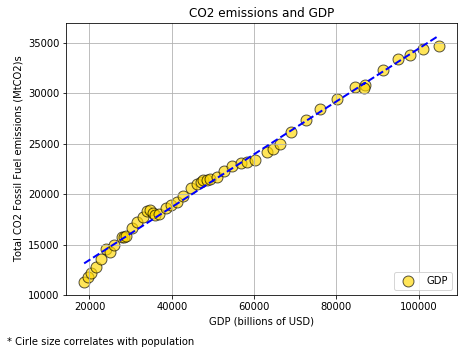

In [9]:
#  Bubble chart – CO2 emissions vs. GDP growth (%)

x_GDP = Fossil_fuel_data["GDP"]/1000000000
y_CO2_emissions = Fossil_fuel_data["Total CO2 Fossil Fuel emissions (MtCO2)"]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.scatter(x_GDP, y_CO2_emissions, marker="o", facecolors="gold", s=x_Population*15, 
            edgecolors="black", alpha=0.65, label="GDP")

# Incorporate the other graph properties
plt.title("CO2 emissions and GDP")
plt.xlabel("GDP (billions of USD)")
plt.ylabel("Total CO2 Fossil Fuel emissions (MtCO2)s")
plt.grid()
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower right')

plt.text(.2, 5100, "* Cirle size correlates with population")  

fig = plt.gcf()
fig.set_size_inches(7,5) 


# Set fit line
(GDP_slope, GDP_intercept, GDP_r_value, GDP_p_value, GDP_std_err) = linregress(x_GDP, y_CO2_emissions)
GDP_fit = GDP_slope * x_GDP + GDP_intercept
ax.plot(x_GDP, GDP_fit, 'b--', linewidth=2)

# Save Figure
plt.savefig("Output/CO_emissions_vs_GDP.png")

plt.show()

In [10]:
#(GDP_slope, GDP_intercept, GDP_r_value, GDP_p_value, GDP_std_err) = linregress(x_GDP, y_CO2_emissions)
#GDP_fit = GDP_slope * x_GDP + GDP_intercept

print(f"Slope value is: {GDP_slope}")
print(f"Intercept value is: {GDP_intercept}")
print(f"R-value is: {GDP_r_value}")
print(f"R-square value is: {np.square(GDP_r_value)}")
print(f"P-value is: {GDP_p_value}")
print(f"Standard error value is: {GDP_std_err}")

Slope value is: 0.2614120672605016
Intercept value is: 8267.19947773714
R-value is: 0.9948432267095468
R-square value is: 0.9897130457298629
P-value is: 2.2703676726314532e-49
Standard error value is: 0.0038467482954702855


# Regression analysis
* 98.97% of the total variability in Y (CO2 emissions) is explained by its regression on X (GDP).

# CO2 emissions vs. Population Growth

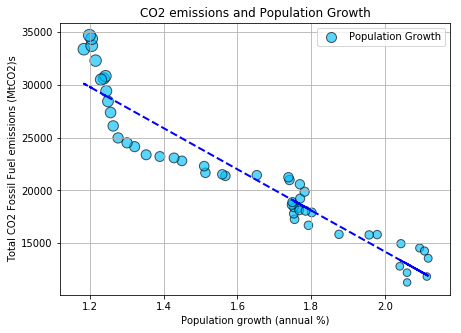

In [11]:
#  Bubble chart – CO2 emissions vs. Population growth (%)

x_Population_growth = Fossil_fuel_data["Population growth (annual %)"]
y_CO2_emissions = Fossil_fuel_data["Total CO2 Fossil Fuel emissions (MtCO2)"]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.scatter(x_Population_growth, y_CO2_emissions, marker="o", facecolors="deepskyblue", s=GDP_per_capita/100, 
            edgecolors="black", alpha=0.65, label="Population Growth")

# Incorporate the other graph properties
plt.title("CO2 emissions and Population Growth")
plt.xlabel("Population growth (annual %)")
plt.ylabel("Total CO2 Fossil Fuel emissions (MtCO2)s")
plt.grid()
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='upper right')

#plt.text(-1.9, 5100, "* Cirle size correlates with GDP per capita")  

fig = plt.gcf()
fig.set_size_inches(7,5) 


# Set fit line
(Populationg_slope, Populationg_intercept, Populationg_r_value, Populationg_p_value, Populationg_std_err) = linregress(x_Population_growth, y_CO2_emissions)
Populationg_fit = Populationg_slope * x_Population_growth + Populationg_intercept
ax.plot(x_Population_growth, Populationg_fit, 'b--', linewidth=2)

# Save Figure
plt.savefig("Output/CO_emissions_vs_Population_Growth.png")

plt.show()

In [12]:
#(Populationg_slope, Populationg_intercept, Populationg_r_value, Populationg_p_value, Populationg_std_err) = linregress(x_Population_growth, y_CO2_emissions)
#Populationg_fit = Populationg_slope * x_Population_growth + Populationg_intercept

print(f"Slope value is: {Populationg_slope}")
print(f"Intercept value is: {Populationg_intercept}")
print(f"R-value is: {Populationg_r_value}")
print(f"R-square value is: {np.square(Populationg_r_value)}")
print(f"P-value is: {Populationg_p_value}")
print(f"Standard error value is: {Populationg_std_err}")

Slope value is: -19549.195453918273
Intercept value is: 53276.68697848055
R-value is: -0.9458772411309391
R-square value is: 0.8946837552894766
P-value is: 4.188850620681395e-25
Standard error value is: 968.10213198963


# Regression analysis
* 89.5% of the total variability in Y (CO2 emissions) is explained by its regression on X (Population Growth).

### Global CO2 Emissions and Consumption Comparison Stacked Plot

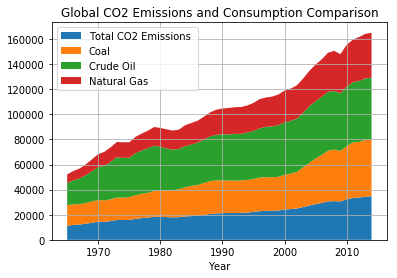

In [15]:
# Stacked line plot of Global CO2 Emissions and Consumption Comparison

#Retrieving data from dataset to plot.
x = Fossil_fuel_data["Year"]
y1 = Fossil_fuel_data["Total CO2 Fossil Fuel emissions (MtCO2)"]
y2 = Fossil_fuel_data["Coal consumption (terawatt-hours)"]
y3 = Fossil_fuel_data["Crude oil consumption (terawatt-hours)"]
y4 = Fossil_fuel_data["Natural gas consumption (terawatt-hours)"]

y = np.vstack([y1, y2, y3, y4])

# Creating labels
labels = ["Total CO2 Emissions ", "Coal", "Crude Oil", "Natural Gas"]

#Plotting points and legend
fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, labels=labels)
ax.legend(loc=2)

#Labeling graph
plt.title("Global CO2 Emissions and Consumption Comparison")
plt.xlabel("Year")
plt.grid()
# Save an image of the chart and print to screen
plt.savefig("Output/CO2 and Consumption Comparison.png")
plt.show()







### GDP vs Population line graph

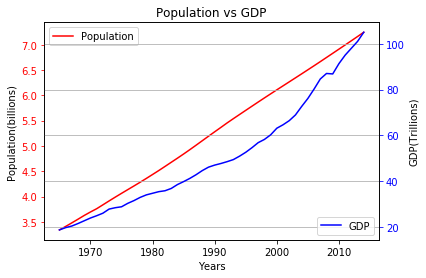

In [16]:
# GDP vs Population line graph

#Retrieving data from dataset to plot.
x = Fossil_fuel_data["Year"].tolist()
y1 = Fossil_fuel_data["Population"]/1000000000
y1 = [int(x.replace(",","")) if isinstance(x, str) else x for x in y1]
y2 = Fossil_fuel_data["GDP"]/1000000000000
y2 = [int(x.replace(",","")) if isinstance(x, str) else x for x in y2]

fig, ax1 = plt.subplots()

# Creating Populaton y-axis, legend, and labels
ax1.plot(x, y1, label='Population',color='red')
ax1.tick_params('y', colors='r')
ax1.legend(loc='upper left')
plt.xlabel("Years")
plt.ylabel("Population(billions)")

# Creating GDP y-axis, legend, and labels
ax2 = ax1.twinx()
ax2.plot(x, y2, label='GDP',color='blue')
ax2.tick_params('y', colors='b')
ax2.legend(loc='lower right')
plt.title("Population vs GDP")
plt.ylabel("GDP(Trillions)")

# Save an image of the chart and print to screen
plt.savefig("Output/CO2 and Consumption Comparison.png")
plt.grid()
plt.show()
